In [16]:
from importlib import reload

## Define Environment

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# floor = lambda x: np.ones_like(x) * -1000.
# ceiling = lambda x: np.ones_like(x) * 0.

def floor (x):
    return -1000. * np.ones_like(x) + 0.001 * x
def ceiling (x):
    return 0. * np.ones_like(x)

In [18]:
from environment import Environment2D

# env = Environment2D(floor=-10., ceiling=0., range_min=0., range_max=10000.)  # TODO: allow float, int types  # TODO: specify sampling step of sampled floor/ceiling if array, or else function must be in meters
env = Environment2D (floor=floor, ceiling=ceiling, range_min=np.array([0., -1000.]), range_max=np.array([100000., 0.]))  # TODO/ range_min and max must be floats (or infer z from floor/ceil and specify x as floats?)
# TODO: raise error when range is too small

## One ray

In [3]:
# from ray import Ray2D
# r0 = Ray2D(env, source=np.array([10, -10]), angle=0)
# r0.propagate(dx_max=100, dz_max=1, n_steps_max=100000)
# r1 = Ray2D(env, source=np.array([10, -10]), angle=0)
# r1.propagate(dx_max=100, dz_max=0.1, n_steps_max=100000)
# r2 = Ray2D(env, source=np.array([10, -10]), angle=0)
# r2.propagate(dx_max=1, dz_max=0.1, n_steps_max=1000000)
# r3 = Ray2D(env, source=np.array([10, -10]), angle=0)
# r3.propagate(dx_max=0.1, dz_max=0.1, n_steps_max=1000000)

# TODO: difference is too big => switch to diff. equation solving between two rebounds!
# TODO: cone of uncertainty integrated at each step?

In [4]:
# # Initialize colors
# n_rays = 4
# cmap = 'Wistia'
# colors = [c for c in plt.get_cmap(cmap)(np.linspace(0, 1, n_rays))]

# fig = plt.figure(figsize=(20, 5))
# plt.plot(env.penv.x, env.ceil(env.penv.x), figure=fig, c='black')  # Plot ceiling
# plt.plot(env.penv.x, env.floor(env.penv.x), figure=fig, c='black')  # Plot floor
# r0.plot(fig, c=colors[0])
# r1.plot(fig, c=colors[1])
# r2.plot(fig, c=colors[2])
# r3.plot(fig, c=colors[3])
# # r2.plot(fig, c='green')

In [59]:
import ray_v4
reload(ray_v4)

ray = ray_v4.Ray2D(env, source=np.array([10, -10]), angle=0)
ray.propagate(n_steps_max=1000)

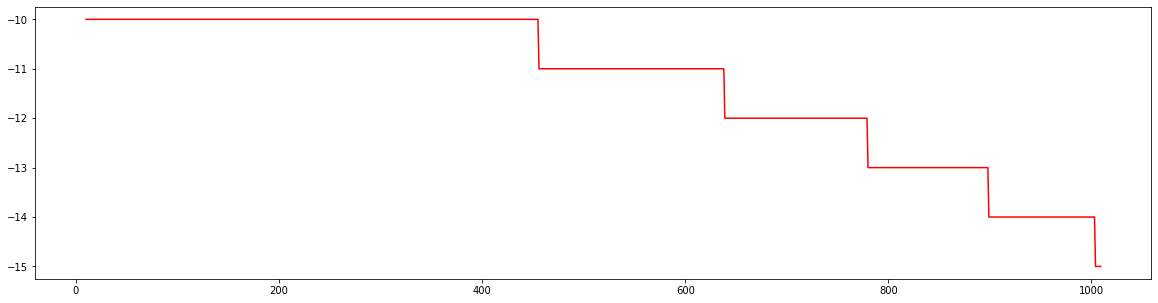

In [63]:
fig = plt.figure(figsize=(20, 5))

ray.plot(fig, c='red')
# TODO: why these steps? interpolation error of c?
# plt.plot(env.penv.calc_c(ray.XZ[:, 0]))

# plt.plot(env.penv.x, env.ceil(env.penv.x), figure=fig, c='black')  # Plot ceiling
# plt.plot(env.penv.x, env.floor(env.penv.x), figure=fig, c='black')  # Plot floor
# plt.xlim((-1, 100001))
# plt.ylim((-1001, 20))

In [3]:
from ray_v4 import Ray2D as Ray2D_New

r = Ray2D_New (env, source=np.array([10, -200]), angle=-0.1)
r.propagate(verbose=True)

NameError: name 'x_dir' is not defined

<ipython-input-4-eb49a24caf67>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


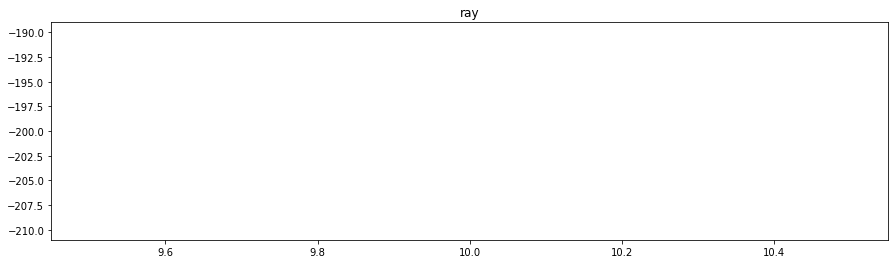

In [4]:
fig = plt.figure(figsize=(15, 4))
r.plot(fig)
plt.title('ray')
fig.show()

## Multiple Rays

In [46]:
from ray import Ray2D  # TODO: from ray_v4 import Ray2D

rays = list()
source = [0, -200]
for angle in np.linspace(-0.5, 0.3, 10):
    r = Ray2D (env, source=np.array([0, -200]), angle=angle)
    rays.append(r)

def propagate_ray (r, **kwargs):
    r.propagate(**kwargs)
    return r

In [47]:
# from pathos.multiprocessing import ProcessingPool as Pool  # multiprocessing library allowing for lambda functions (uses dill instead of pickle)
# with Pool() as pool:
#     rays_new = pool.map(propagate_ray, rays)  #! Executed in 1m 0.1s

# import concurrent.futures
# with concurrent.futures.ThreadPoolExecutor() as executor:
#     executor.map(propagate_ray, rays)  #! Executed in 2m 19.1s

# import multiprocessing
# # multiprocessing.set_start_method('spawn', force=True, serializer='dill')
# with multiprocessing.Pool() as pool:
#     rays_new = pool.map(propagate_ray, rays)  #! Slower than pathos.multiprocessing (>5min)

# processes = [multiprocessing.Process(target=r_prop, args=(r,)) for r in rays]
# for p in processes: p.start()
# for p in processes: p.join()

In [51]:
for r in rays:
    r.propagate()  #! Executed in 2m 10.7s

<ipython-input-58-5e161477fd8d>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-58-5e161477fd8d>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


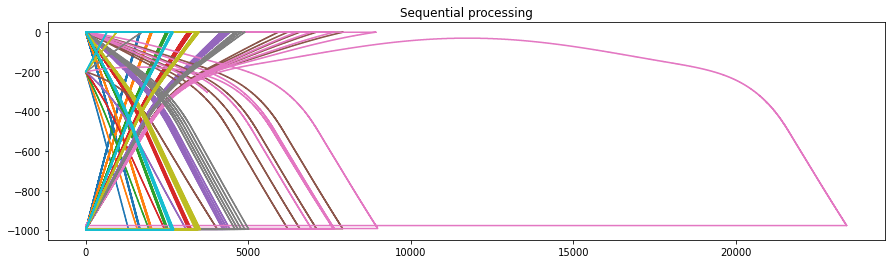

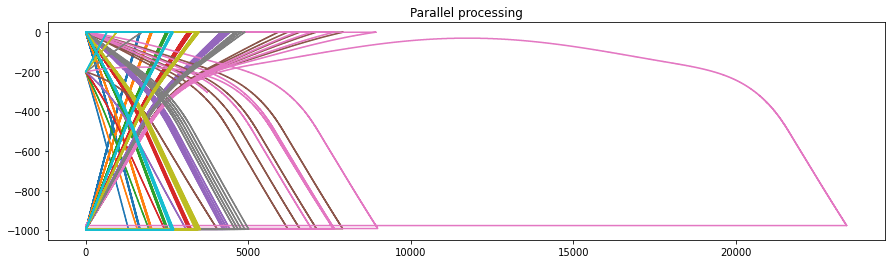

In [58]:
fig = plt.figure(figsize=(15, 4))
for r in rays:
    r.plot(fig)  # TODO: option to plot with equal scale, etc
plt.title('Sequential processing')
fig.show()

fig = plt.figure(figsize=(15, 4))
for r in rays_new:
    r.plot(fig)  # TODO: option to plot with equal scale, etc
plt.title('Parallel processing')
fig.show()